<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv6-Kemish12/blob/main/Proyecto_Delf%C3%ADn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Análisis de datos ===
Total de filas en el CSV original: 20,000
Total de filas después de filtrar solo muones globales: 18,881

Primeras 5 filas del DataFrame filtrado:
      Run     Event type1       E1     px1     py1      pz1     pt1    eta1  \
0  165617  75100943     G   6.2039 -4.2666  0.4565  -4.4793  4.2910 -0.9121   
1  165617  75587682     G  19.2892 -4.2121 -0.6516  18.8121  4.2622  2.1905   
2  165617  75167029     G   9.7583  2.3903 -3.7824   8.6715  4.4744  1.4156   
3  165617  75281957     G   9.6365  1.6516 -5.4313   7.7862  5.6769  1.1213   
4  165617  75393376     G   6.0112  3.3614  2.8883   4.0598  4.4318  0.8208   

     phi1  Q1 type2       E2     px2     py2      pz2     pt2    eta2    phi2  \
0  3.0350  -1     G   9.6690  7.2740 -2.8211  -5.7104  7.8019 -0.6786 -0.3700   
1 -2.9881  -1     G   9.8244  4.3439 -0.4735   8.7985  4.3697  1.4497 -0.1086   
2 -1.0072  -1     G  13.5684 -3.3975  5.1910  12.0665  6.2039  1.4187  2.1503   
3 -1.2756   1     G   7.0263

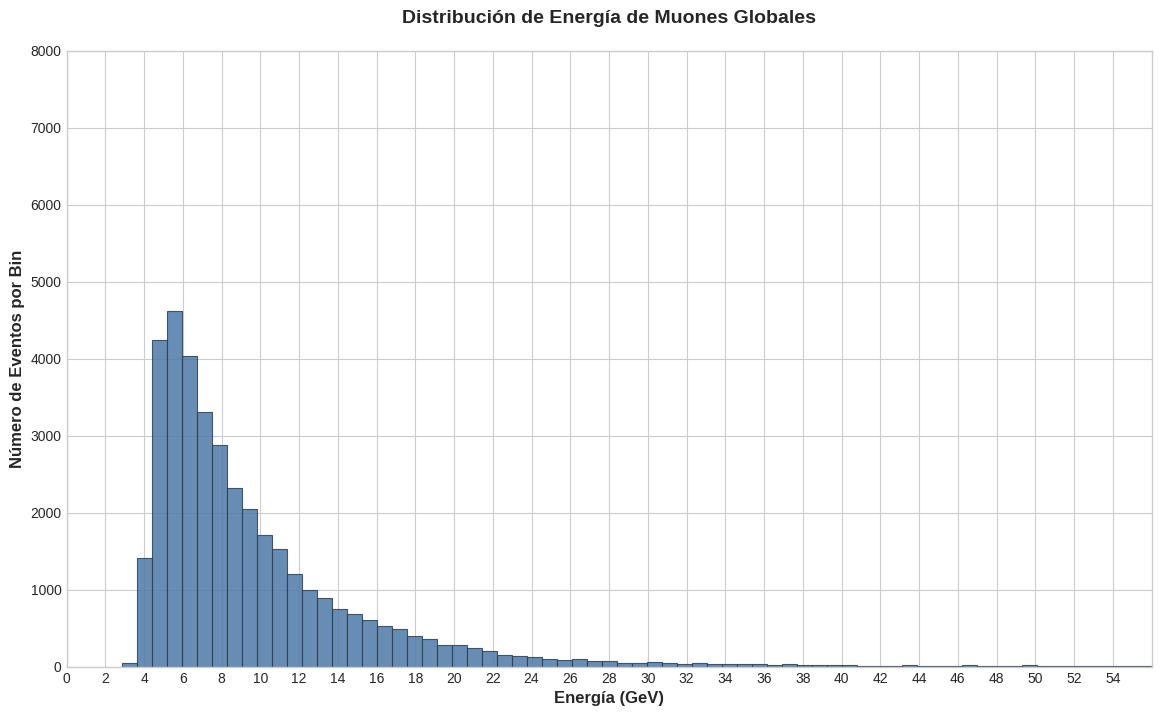

Total de eventos en CSV original: 20,000
Total de eventos con ambos muones globales: 18,881


/tmp/ipython-input-17-481300484.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global['MasaInvariante'] = calcular_masa_invariante(df_global)


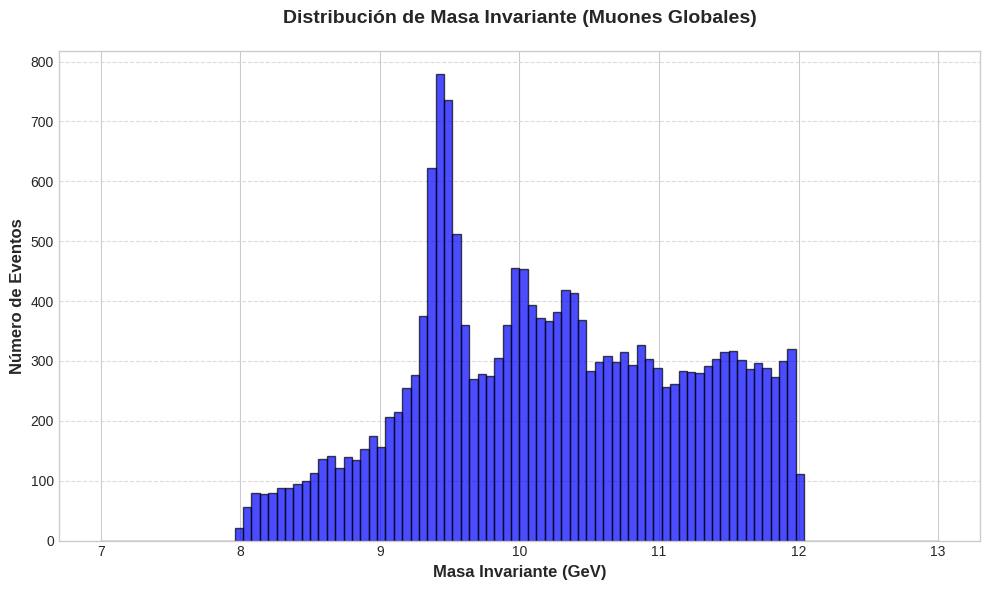

Eventos totales en el histograma: 37,762
Esto DEBE coincidir con: 20,000
Total de eventos en CSV original: 20,000
Total de eventos con ambos muones globales: 18,881

=== Eventos con Dos Cargas Positivas ===
Número de eventos con dos cargas positivas: 0

=== Eventos con Dos Cargas Negativas ===
Número de eventos con dos cargas negativas: 0


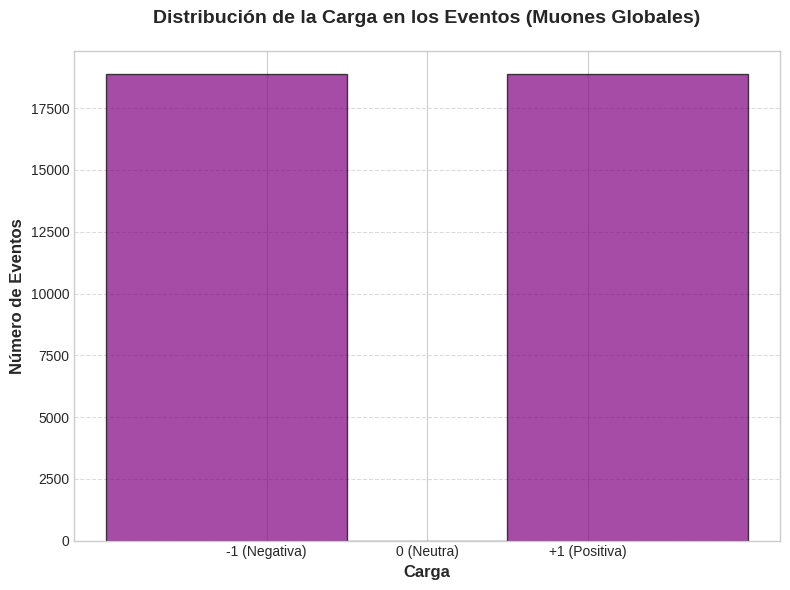


=== Distribución de la carga ===
Eventos con carga negativa (-1): 18,881
Eventos con carga neutra (0): 0
Eventos con carga positiva (+1): 18,881

Valores únicos en 'carga1':
[-1  1]

Valores únicos en 'carga2':
[ 1 -1]
Total de eventos en CSV original: 20,000
Total de eventos con ambos muones globales: 18,881


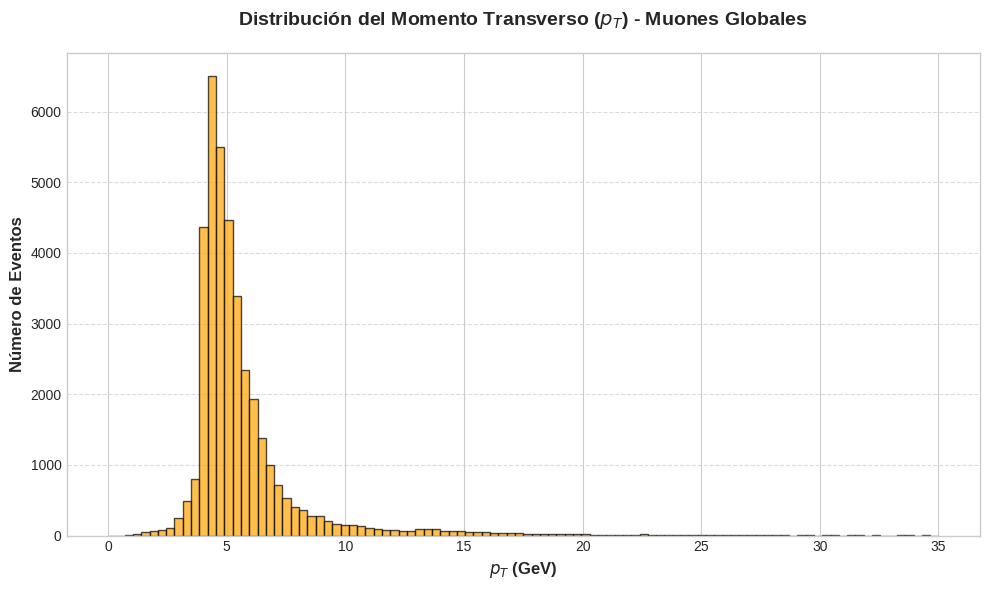


=== Estadísticas de $p_T$ (solo muones globales) ===
Valor mínimo de $p_T$: 1.00 GeV
Valor máximo de $p_T$: 79.53 GeV
Número total de valores de $p_T$: 37,762
Total de eventos en CSV original: 20,000
Total de eventos con ambos muones globales: 18,881


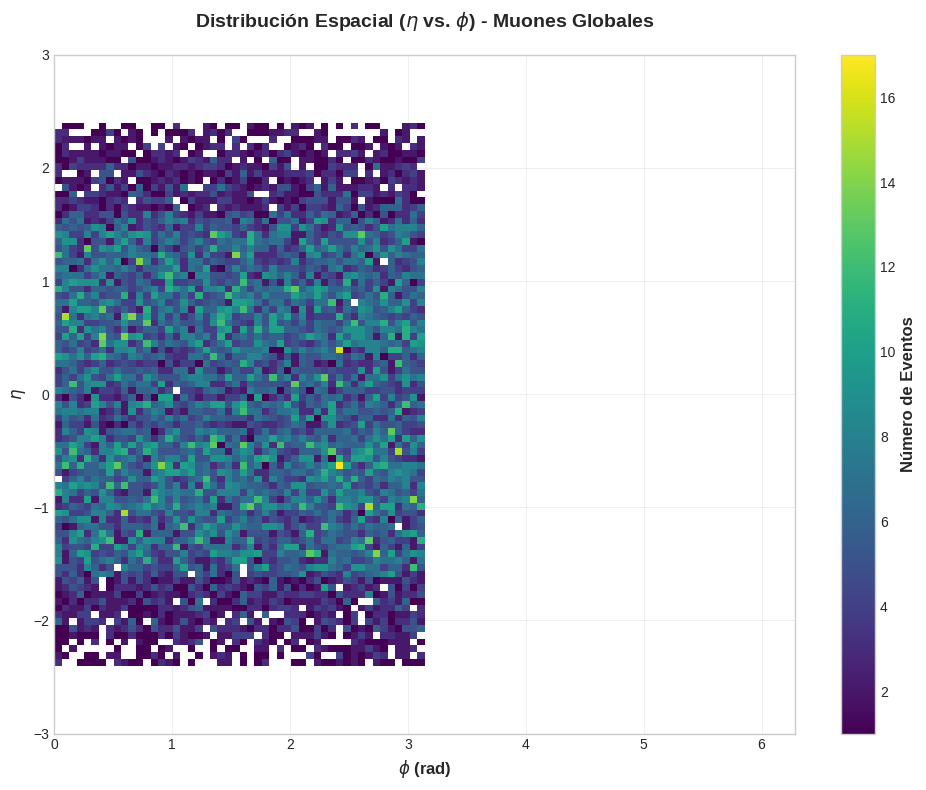


=== Estadísticas de eta y phi (solo muones globales) ===
Valor mínimo de eta: -2.40
Valor máximo de eta: 2.40
Valor mínimo de phi: -3.14
Valor máximo de phi: 3.14
Total de eventos en CSV original: 20,000
Total de eventos con ambos muones globales: 18,881


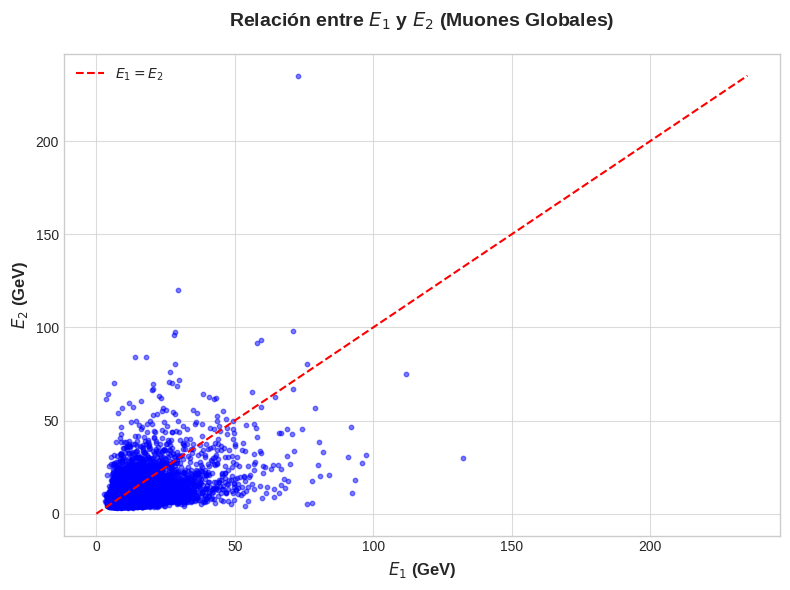


=== Estadísticas de E1 y E2 ===
Energía mínima de E1: 2.87 GeV
Energía máxima de E1: 132.46 GeV
Energía mínima de E2: 3.00 GeV
Energía máxima de E2: 235.14 GeV

=== Estadísticas de phi (ambos muones globales) ===
Número de eventos con ambos muones globales: 18,881
Número total de muones globales (de esos eventos): 37,762
Valor mínimo de phi: -3.14 rad
Valor máximo de phi: 3.14 rad


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

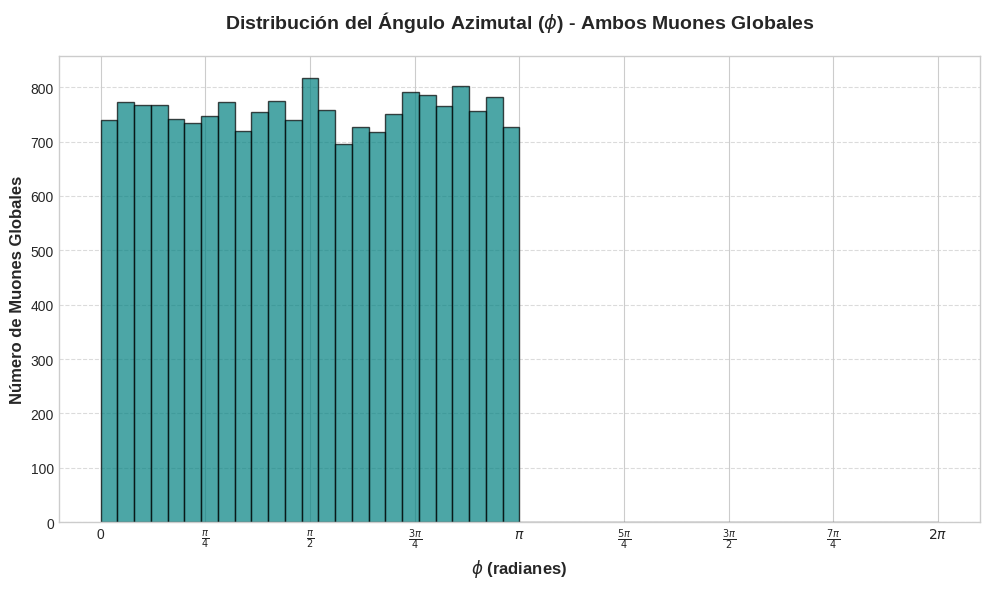

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files



# 1. Cargar los datos con verificación
url = "https://raw.githubusercontent.com/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv6-Kemish12/main/Sample6.csv"
datos = pd.read_csv(url)

# 2. Filtrar solo los eventos donde ambos muones son globales (type1 y type2 == 'G')
df_global = datos[
    (datos['type1'] == 'G') &
    (datos['type2'] == 'G')
]

print("=== Análisis de datos ===")
print(f"Total de filas en el CSV original: {len(datos):,}")
print(f"Total de filas después de filtrar solo muones globales: {len(df_global):,}")
print("\nPrimeras 5 filas del DataFrame filtrado:")
print(df_global.head())

print("\nResumen estadístico E1 y E2 (muones globales):")
print(df_global[['E1', 'E2']].describe())

# 3. Combinación robusta de energías
def combinar_energias(df):
    # Filtrar filas donde E1 y E2 no sean NaN
    df_filtrado = df.dropna(subset=['E1', 'E2'])

    # Unir todas las energías en un solo array
    energias_combinadas = pd.concat([df_filtrado['E1'], df_filtrado['E2']])

    print("\n=== Estadísticas combinadas ===")
    print(f"Eventos originales (muones globales): {len(df):,}")
    print(f"Eventos después de filtrar NaN: {len(df_filtrado):,}")
    print(f"Energía mínima: {energias_combinadas.min():.2f} GeV")
    print(f"Energía máxima: {energias_combinadas.max():.2f} GeV")

    return energias_combinadas.values

try:
    todas_energias = combinar_energias(df_global)
except ValueError as e:
    print(f"\nError: {e}")
    exit()

# 4. Configuración del histograma
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# Crear histograma
counts, bins, patches = plt.hist(
    todas_energias,
    bins=300,
    color='#4e79a7',
    edgecolor='#2c3e50',
    alpha=0.85,
    linewidth=0.8
)

# 5. Ajustar ejes
max_count = counts.max()
y_max = max(8000, max_count * 1.2)  # Ajusta según tus datos
plt.ylim(0, y_max)
plt.xlim(0, 56)
plt.xticks(np.arange(0, 56, 2), fontsize=10)
plt.yticks(np.arange(0, int(y_max)+1000, 1000), fontsize=10)

# 6. Etiquetas y título
plt.xlabel('Energía (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos por Bin', fontsize=12, fontweight='bold')
plt.title(
    'Distribución de Energía de Muones Globales',
    fontsize=14,
    pad=20,
    fontweight='bold'
)

#plt.savefig('Eventos vs energía globales.png', dpi=300, bbox_inches='tight')
#files.download('Eventos vs energía globales.png')
plt.show()


# 2. Filtrar solo los eventos donde ambos muones son globales
df_global = datos[
    (datos['type1'] == 'G') &
    (datos['type2'] == 'G')
]

print(f"Total de eventos en CSV original: {len(datos):,}")
print(f"Total de eventos con ambos muones globales: {len(df_global):,}")

# 3. Calcular la masa invariante para cada evento filtrado
def calcular_masa_invariante(df):
    E1 = df['E1']
    E2 = df['E2']
    px1 = df['px1']
    py1 = df['py1']
    pz1 = df['pz1']
    px2 = df['px2']
    py2 = df['py2']
    pz2 = df['pz2']

    energia_total = E1 + E2
    momento_total_x = px1 + px2
    momento_total_y = py1 + py2
    momento_total_z = pz1 + pz2
    momento_total_cuadrado = momento_total_x**2 + momento_total_y**2 + momento_total_z**2

    masa_invariante = np.sqrt(energia_total**2 - momento_total_cuadrado)
    return masa_invariante

# Calcular masa invariante y agregarla al DataFrame filtrado
df_global['MasaInvariante'] = calcular_masa_invariante(df_global)

# 4. Crear histograma de la masa invariante
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(
    df_global['MasaInvariante'],
    bins=100,
    range=(7, 13),
    color='blue',
    alpha=0.7,
    edgecolor='black'
)

# Etiquetas y título
plt.xlabel('Masa Invariante (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos', fontsize=12, fontweight='bold')
plt.title('Distribución de Masa Invariante (Muones Globales)', fontsize=14, pad=20, fontweight='bold')

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Mostrar la gráfica
#plt.savefig('eventos vs masa invariante globales.png', dpi=300, bbox_inches='tight')
#files.download('eventos vs masa invariante globales.png')
plt.show()

# Contar el número total de eventos en el histograma
conteo_total_histograma = np.sum(counts)
print(f"Eventos totales en el histograma: {int(conteo_total_histograma):,}")
print(f"Esto DEBE coincidir con: {len(datos):,}")

# 2. Filtrar solo eventos donde ambos muones sean globales
df_global = datos[
    (datos['type1'] == 'G') &
    (datos['type2'] == 'G')
]

print(f"Total de eventos en CSV original: {len(datos):,}")
print(f"Total de eventos con ambos muones globales: {len(df_global):,}")

# 3. Verificar si hay columnas de carga
if 'Q1' not in df_global.columns or 'Q2' not in df_global.columns:
    raise ValueError("El archivo CSV debe contener columnas 'Q1' y 'Q2'.")

# 4. Buscar eventos con dos cargas positivas o dos negativas (solo de muones globales)
eventos_dos_positivas = df_global[(df_global['Q1'] > 0) & (df_global['Q2'] > 0)]
eventos_dos_negativas = df_global[(df_global['Q1'] < 0) & (df_global['Q2'] < 0)]

# 5. Mostrar los resultados
print("\n=== Eventos con Dos Cargas Positivas ===")
print(f"Número de eventos con dos cargas positivas: {len(eventos_dos_positivas)}")
if len(eventos_dos_positivas) > 0:
    print(eventos_dos_positivas[['Q1', 'Q2']])

print("\n=== Eventos con Dos Cargas Negativas ===")
print(f"Número de eventos con dos cargas negativas: {len(eventos_dos_negativas)}")
if len(eventos_dos_negativas) > 0:
    print(eventos_dos_negativas[['Q1', 'Q2']])

# 6. Combinar las cargas de ambas partículas (solo de muones globales)
cargas_combinadas = pd.concat([df_global['Q1'], df_global['Q2']])

# 7. Crear el histograma de la distribución de la carga
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8-whitegrid')

counts, bins, patches = plt.hist(
    cargas_combinadas,
    bins=[-2, -0.5, 0, 0.5, 2],  # Bins para cargas -1, 0, +1
    color='purple',
    alpha=0.7,
    edgecolor='black'
)

# Etiquetas y título
plt.xlabel('Carga', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos', fontsize=12, fontweight='bold')
plt.title('Distribución de la Carga en los Eventos (Muones Globales)', fontsize=14, pad=20, fontweight='bold')

# Personalizar etiquetas del eje x
plt.xticks([-1, 0, 1], ['-1 (Negativa)', '0 (Neutra)', '+1 (Positiva)'], fontsize=10)

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
#plt.savefig('distribución cargas globales.png', dpi=300, bbox_inches='tight')
#files.download('distribución cargas globales.png')
plt.show()


# 4. Verificación adicional
print("\n=== Distribución de la carga ===")
print(f"Eventos con carga negativa (-1): {len(cargas_combinadas[cargas_combinadas == -1]):,}")
print(f"Eventos con carga neutra (0): {len(cargas_combinadas[cargas_combinadas == 0]):,}")
print(f"Eventos con carga positiva (+1): {len(cargas_combinadas[cargas_combinadas == 1]):,}")

print("\nValores únicos en 'carga1':")
print(datos['Q1'].unique())

print("\nValores únicos en 'carga2':")
print(datos['Q2'].unique())


# 2. Filtrar solo eventos donde ambos muones sean globales
df_global = datos[
    (datos['type1'] == 'G') &
    (datos['type2'] == 'G')
]

print(f"Total de eventos en CSV original: {len(datos):,}")
print(f"Total de eventos con ambos muones globales: {len(df_global):,}")

# 3. Verificar si las columnas de pT están presentes
if 'pt1' not in df_global.columns or 'pt2' not in df_global.columns:
    raise ValueError("El archivo CSV debe contener columnas 'pt1' y 'pt2'.")

# 4. Combinar los valores de pT de ambas partículas (solo muones globales)
pT_combinado = pd.concat([df_global['pt1'], df_global['pt2']])

# 5. Crear el histograma de la distribución de pT
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

counts, bins, patches = plt.hist(
    pT_combinado,
    bins=100,           # Número de bins
    range=(0, 35),      # Rango típico para pT en GeV
    color='orange',
    alpha=0.7,
    edgecolor='black'
)

# Etiquetas y título
plt.xlabel('$p_T$ (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos', fontsize=12, fontweight='bold')
plt.title('Distribución del Momento Transverso ($p_T$) - Muones Globales', fontsize=14, pad=20, fontweight='bold')

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
#plt.savefig('eventos_vs_pt globales.png', dpi=300, bbox_inches='tight')
#files.download('eventos_vs_pt globales.png')
plt.show()

# 6. Verificación adicional
print("\n=== Estadísticas de $p_T$ (solo muones globales) ===")
print(f"Valor mínimo de $p_T$: {pT_combinado.min():.2f} GeV")
print(f"Valor máximo de $p_T$: {pT_combinado.max():.2f} GeV")
print(f"Número total de valores de $p_T$: {len(pT_combinado):,}")
# Verificar si las columnas eta y phi están presentes
if 'eta1' not in datos.columns or 'phi1' not in datos.columns:
    raise ValueError("El archivo CSV debe contener columnas 'eta1' y 'phi1'.")

# 2. Filtrar solo eventos donde ambos muones sean globales
df_global = datos[
    (datos['type1'] == 'G') &
    (datos['type2'] == 'G')
]

print(f"Total de eventos en CSV original: {len(datos):,}")
print(f"Total de eventos con ambos muones globales: {len(df_global):,}")

# 3. Combinar los valores de eta y phi solo de muones globales
eta_combinado = pd.concat([df_global['eta1'], df_global['eta2']])
phi_combinado = pd.concat([df_global['phi1'], df_global['phi2']])

# 4. Crear el histograma 2D de eta vs phi
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-whitegrid')

hist = plt.hist2d(
    phi_combinado,           # Eje x: phi
    eta_combinado,           # Eje y: eta
    bins=[100, 100],         # Número de bins en x e y
    range=[[0, 2 * np.pi], [-3, 3]],  # Rango típico para phi y eta
    cmap='viridis',         # Mapa de colores
    cmin=1                  # Solo mostrar bins con al menos 1 evento
)

# Etiquetas y título
plt.xlabel('$\phi$ (rad)', fontsize=12, fontweight='bold')
plt.ylabel('$\eta$', fontsize=12, fontweight='bold')
plt.title('Distribución Espacial ($\eta$ vs. $\phi$) - Muones Globales', fontsize=14, pad=20, fontweight='bold')

# Barra de color
cbar = plt.colorbar(hist[3], ax=plt.gca())
cbar.set_label('Número de Eventos', fontsize=12, fontweight='bold')

# Mejoras visuales
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar la gráfica
#plt.savefig('eta_vs_phi globales.png', dpi=300, bbox_inches='tight')
#files.download('eta_vs_phi globales.png')
plt.show()

# 5. Verificación adicional
print("\n=== Estadísticas de eta y phi (solo muones globales) ===")
print(f"Valor mínimo de eta: {eta_combinado.min():.2f}")
print(f"Valor máximo de eta: {eta_combinado.max():.2f}")
print(f"Valor mínimo de phi: {phi_combinado.min():.2f}")
print(f"Valor máximo de phi: {phi_combinado.max():.2f}")


# 2. Filtrar solo eventos donde ambos muones sean globales
df_global = datos[
    (datos['type1'] == 'G') &
    (datos['type2'] == 'G')
]

print(f"Total de eventos en CSV original: {len(datos):,}")
print(f"Total de eventos con ambos muones globales: {len(df_global):,}")

# Verificar si las columnas E1 y E2 están presentes
if 'E1' not in df_global.columns or 'E2' not in df_global.columns:
    raise ValueError("El archivo CSV debe contener columnas 'E1' y 'E2'.")

# Extraer las energías de los muones globales
E1 = df_global['E1']
E2 = df_global['E2']

# 3. Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8-whitegrid')

plt.scatter(
    E1,  # Eje x: Energía de la partícula 1
    E2,  # Eje y: Energía de la partícula 2
    alpha=0.5,  # Transparencia
    s=10,       # Tamaño de puntos
    color='blue'
)

# Etiquetas y título
plt.xlabel('$E_1$ (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('$E_2$ (GeV)', fontsize=12, fontweight='bold')
plt.title('Relación entre $E_1$ y $E_2$ (Muones Globales)', fontsize=14, pad=20, fontweight='bold')

# Línea diagonal de referencia (E1 = E2)
max_energy = max(E1.max(), E2.max())
plt.plot([0, max_energy], [0, max_energy], color='red', linestyle='--', linewidth=1.5, label='$E_1 = E_2$')
plt.legend(fontsize=10)

# Mejoras visuales
plt.grid(alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
#plt.savefig('E2 vs E1 globales.png', dpi=300, bbox_inches='tight')
#files.download('E2 vs E1 globales.png')
plt.show()

# 3. Verificación adicional
print("\n=== Estadísticas de E1 y E2 ===")
print(f"Energía mínima de E1: {E1.min():.2f} GeV")
print(f"Energía máxima de E1: {E1.max():.2f} GeV")
print(f"Energía mínima de E2: {E2.min():.2f} GeV")
print(f"Energía máxima de E2: {E2.max():.2f} GeV")


# 1️⃣ Verificar que existan las columnas necesarias
columnas_requeridas = ['phi1', 'phi2', 'type1', 'type2']
for col in columnas_requeridas:
    if col not in datos.columns:
        raise ValueError(f"El archivo CSV debe contener la columna '{col}'.")

# 2️⃣ Filtrar solo los eventos donde *ambos* muones son globales
df_globales = datos[(datos['type1'] == 'G') & (datos['type2'] == 'G')]

# Combinar los valores de phi1 y phi2 en una sola serie
phi_globales = pd.concat([df_globales['phi1'], df_globales['phi2']])

# 3️⃣ Crear el histograma
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(
    phi_globales,
    bins=50,
    range=(0, 2 * np.pi),
    color='teal',
    alpha=0.7,
    edgecolor='black'
)

# Etiquetas y título
plt.xlabel('$\phi$ (radianes)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Muones Globales', fontsize=12, fontweight='bold')
plt.title('Distribución del Ángulo Azimutal ($\phi$) - Ambos Muones Globales', fontsize=14, pad=20, fontweight='bold')

# Etiquetas del eje x en múltiplos de π
plt.xticks(
    ticks=np.linspace(0, 2 * np.pi, 9),
    labels=['0', '$\\frac{\\pi}{4}$', '$\\frac{\\pi}{2}$', '$\\frac{3\\pi}{4}$', '$\\pi$',
            '$\\frac{5\\pi}{4}$', '$\\frac{3\\pi}{2}$', '$\\frac{7\\pi}{4}$', '$2\\pi$'],
    fontsize=10
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# 4️⃣ Estadísticas
print("\n=== Estadísticas de phi (ambos muones globales) ===")
print(f"Número de eventos con ambos muones globales: {len(df_globales):,}")
print(f"Número total de muones globales (de esos eventos): {len(phi_globales):,}")
print(f"Valor mínimo de phi: {phi_globales.min():.2f} rad")
print(f"Valor máximo de phi: {phi_globales.max():.2f} rad")


# Mostrar la gráfica

plt.savefig('Eventos vs phi globales.png', dpi=300, bbox_inches='tight')
files.download('Eventos vs phi globales.png')
plt.show()









